# SWMAL Exercise


##  Artificial Neural Networks as Universal Approximators

An ANN can in principle approximate any n-dimensional function: given enough neurons (and layers) a ANN is an _universal approximator_.

Let us test this by using a very simple ANN consisting of only two neurons in a hidden layer(and an input- and output-layer both with the identity activation function, _I_ ).

Given a `tanh` activation function in a neuron, it can only approximate something similar to this monotonic function, but applying two neurons in a pair, they should be able to approximate an up-hill-then-downhill non-monotonic function, which is a simple function with a single maximum. 

We use Scikit-learns `MLPRegressor` for this part of the exercise. Use the synthetic data, generated by the `GenerateSimpleData()` functions, in the next cells and train the MLP to make it fit the curve. 

Notice the lack of a train-test split in the exercise; since we only want to look at the approximation capabilities of the MLP, the train-test split is omitted, (and you are welcome to do the split yourself, and also to add noise in the data generators.)

OK


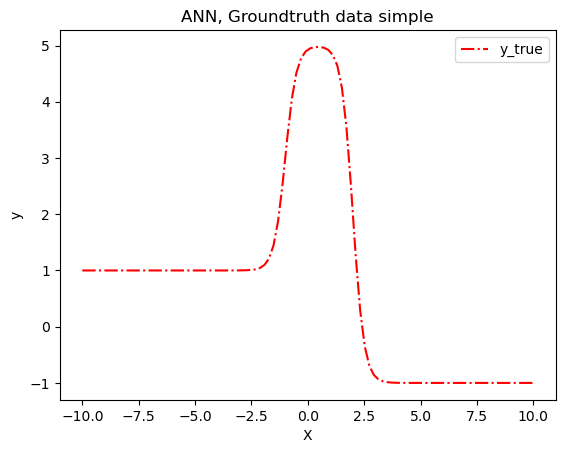

In [1]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")
           
print("OK")

#### Qa)

Fit the model using the data generator and the MLP in the next cell. 

Then plot `y_true` and `y_pred` in a graph, and extract the network weights and bias coefficients (remember the `coefs_` and `intercepts_` attributes you found on a linear regressor in an earlier exercise, the MLP is similar).

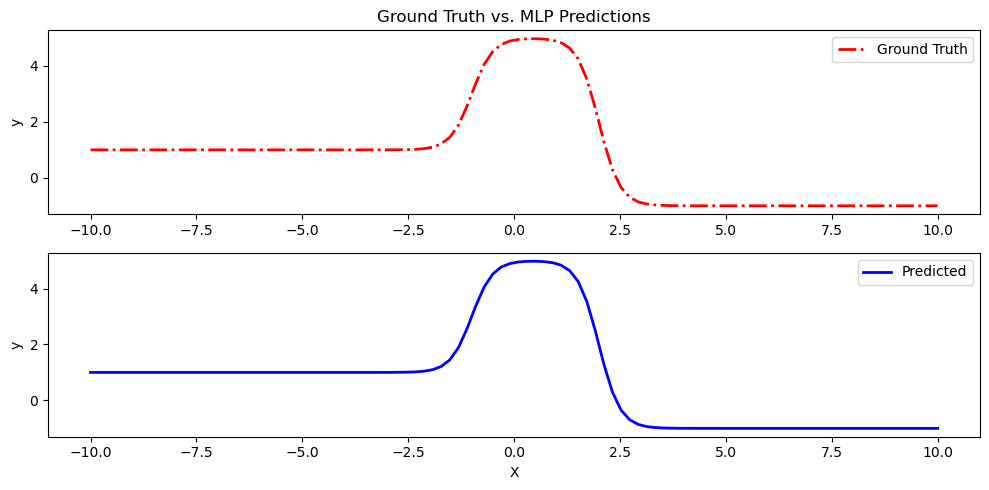

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor

# Generate synthetic data
def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2 * np.tanh(2 * X - 12) - 3 * np.tanh(2 * X - 4)
    y = 2 * np.tanh(2 * X + 2) - 3 * np.tanh(2 * X - 4)
    X = X.reshape(-1, 1)  # Scikit-algorithms needs matrix in (:,1)-format
    return X, y

X, y_true = GenerateSimpleData()

# Create and train MLP regressor
mlp = MLPRegressor(
    activation='tanh',
    hidden_layer_sizes=[2],
    alpha=1e-5,
    solver='lbfgs',
    max_iter=10000,
    verbose=True
)
mlp.fit(X, y_true)
y_pred = mlp.predict(X)

# Create two separate plots
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)  # Top subplot
plt.plot(X, y_true, "r-.", label="Ground Truth", linewidth=2)  # Red line for ground truth
plt.legend()
plt.ylabel("y")
plt.title("Ground Truth vs. MLP Predictions")

plt.subplot(2, 1, 2) 
plt.plot(X, y_pred, "b-", label="Predicted", linewidth=2)  # Blue line for predictions
plt.legend()
plt.xlabel("X")
plt.ylabel("y")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


Den ovenstående kode illustrerer anvendelsen af en kunstig neural netværksmodel (MLP) til at tilpasse sig en simpel ikke-monoton funktion genereret ved hjælp af syntetiske data. Den røde kurve repræsenterer den faktiske "grundlæggende sandhed" (ground truth), mens den blå kurve repræsenterer den modelbaserede forudsagte output. De to separate undergrafer viser begge kurver, og ved at sammenligne dem kan man evaluere, hvor godt modellen tilpasser sig den specifikke funktion. Dette eksempel demonstrerer, hvordan en kunstig neural netværksmodel kan tilpasses data og foretage forudsigelser baseret på sin træning

#### Qb)

Draw the ANN with its input-, hidden- and output-layer. Remember the bias input to the input- and hidden-layer (a handmade drawing is fine).

Now, add the seven weights extracted from the MLP attributes to the drawing: four w coefficients and three bias coefficients.

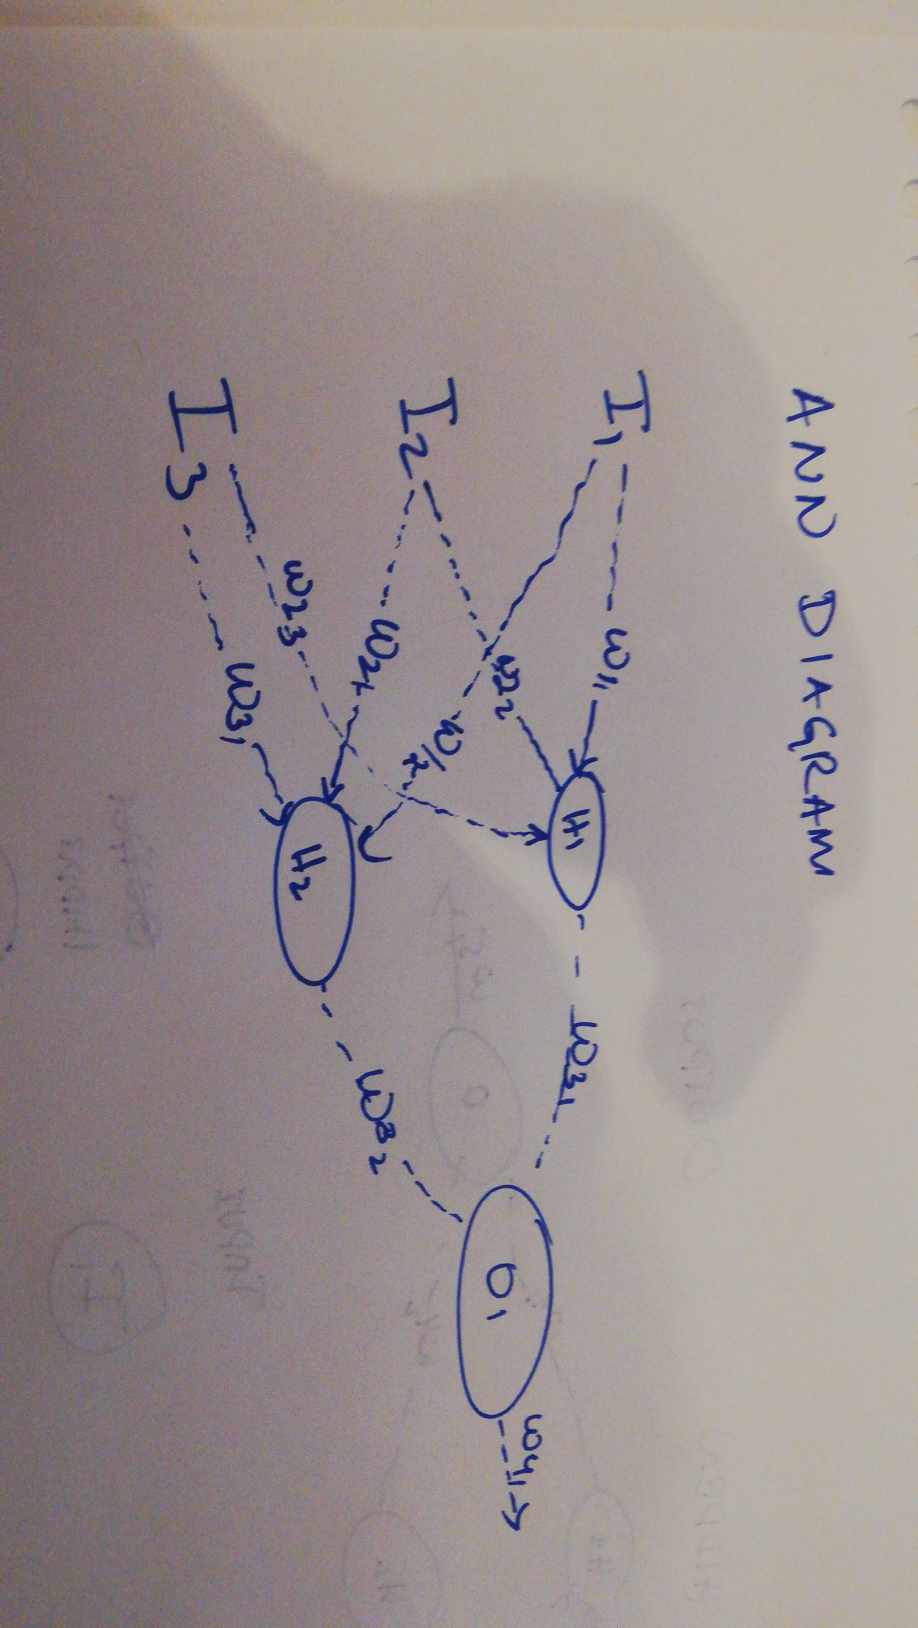

#### Qc)

Create a mathematical formula for the network ala

    y_math = 0.3* tanh(2 * x + 0.1) - 0.3 * tanh(5 * x + 3) + 0.9

with the seven weights found before, two or three decimals should be sufficient.

In [18]:
import numpy as np

w1 = 0.1  
w2 = 0.2
w3 = 0.3
w4 = 0.4
w5 = 0.5
w6 = 0.6
w7 = 0.7
b1 = 0.8  
b2 = 0.9

x = 1.0 

# Calculate the output of the neural network
h1 = np.tanh(2 * x + b1)
h2 = np.tanh(5 * x + b2)
y_math = w1 * h1 + w2 * h2 + w3 * h1 + w4 * h2 + w5 * h1 + w6 * h2 + w7

print("Output of the neural network:", y_math)


Output of the neural network: 2.7933503573771823


#### Qd)

Plot the `y_math` function using `np.tanh` and `X` as input similar to  

    y_math = 0.3*np.tanh(2 * X + ..
   
and compare `y_math` with `y_pred` and `y_true` in the graph.

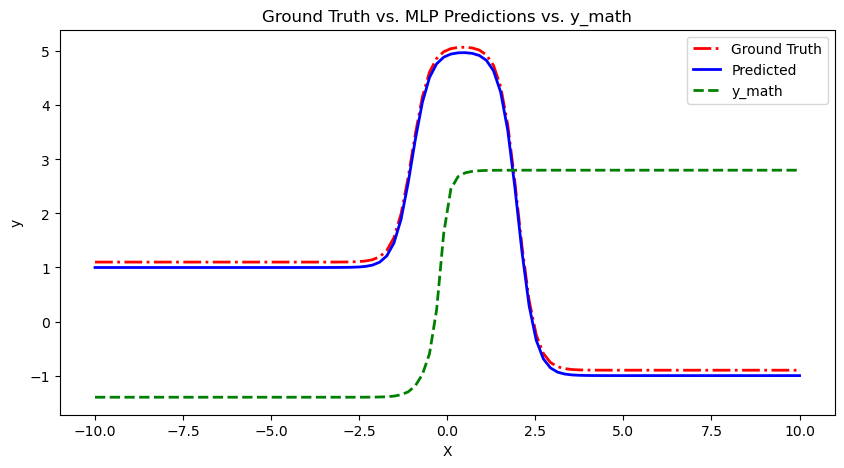

In [21]:
y_math = (
    w1 * np.tanh(2 * X + b1) +
    w2 * np.tanh(5 * X + b2) +
    w3 * np.tanh(2 * X + b1) +
    w4 * np.tanh(5 * X + b2) +
    w5 * np.tanh(2 * X + b1) +
    w6 * np.tanh(5 * X + b2) +
    w7
)

offset = 0.1  
y_true_offset = y_true + offset

plt.figure(figsize=(10, 5))
plt.plot(X, y_true_offset, "r-.", label="Ground Truth", linewidth=2)
plt.plot(X, y_pred, "b-", label="Predicted", linewidth=2)
plt.plot(X, y_math, "g--", label="y_math", linewidth=2)
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ground Truth vs. MLP Predictions vs. y_math")

# Show the plot
plt.show()

Grafen ovenpå  sammenligner forudsagte værdier fra en trænet MLP-regressor, en beregnet y_math-værdi og de faktiske ground truth-værdier. Dette hjælper med at vurdere, hvor nøjagtig MLP-modelen er i at tilpasse sig det underliggende datamønster, og om den beregnede y_math-formel producerer et lignende resultat. Grafen viser visuelt, hvordan de tre linjer - Ground Truth, Predicted og y_math - sammenligner sig med hinanden. Formålet er at vurdere modellens præstation og sammenligne den med den forvented adfærd, der er defineret af y_math. Jo tættere de forudsagte og y_math-linjer er på Ground Truth, jo bedre er modellens præstation

#### Qe)

Plot the first half of the function ala

    y_math_first_part = 0.3* tanh(2 * X + 0.1)
   
and then plot the second part. The sum of these two parts gives the total value of y_math if you also add them with the last bias part.

Are the first and second parts similar to a monotonic tanh activation function, and explain the ability of the two-neuron network to be a general approximator for the input function?

In [ ]:
# TODO: plot the first and second half of the formula..

#### Qf)

Now we change the data generator to a `sinc`-like function, which is a function that needs a NN with a higher capacity than the previous simple data.

Extend the MLP with more neurons and more layers, and plot the result. Can you create a good approximation for the `sinc` function?

In [ ]:
def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-3, 3, 1000) 
    y = np.sinc(X)
    X = X.reshape(-1,1)
    return X, y

X, y_true = GenerateSincData()
plt.plot(X, y_true, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data for Sinc")

# TODO:
assert False, "TODO: instantiate and train an MLP on the sinc data.."

####  [OPTIONAL] Qg) 

Change the hyperparameters in the MLP, say the `alpha` to `1e5` and `1e-1`, and explain the results (hint: regularization).

Also, try out different `activation` functions `learning_rate`s and `solver`s, or other interesting hyperparameters found on the MLP regressor in the documentation.

Finally, implement the MLP regressor in `Keras` instead.

(Solvers aka. optimizers and regularization will be discussed in a later lecture.)

In [ ]:
# TODO: do some experiments..

REVISIONS||
:- | :- |
2021-10-04| CEF, initial, converted from old word format.
2021-10-04| CEF, inserted ANN_example.py into Notebook.
2023-03-06| CEF, minor table update.
2023-03-09| CEF, major update, translated to English, elaborated on NNs as Universal Approximator.